In [16]:
# Install required module (if not exists)
#!pip3 install pandas
#!pip3 install scikit-learn  

In [49]:
# Import required libraries in this lab
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [50]:
# Set random seed for numpy and sklearn (scikit-learn)
np.random.seed(525)

# **Datascience Lab 13**

Generate Dataset

In [51]:
def bmi_generator():
    while True:
        weight = random.randint(40, 140)
        height = random.randint(130, 200)
        bmi = weight / (height/100) ** 2
        if bmi<18.5:
            y = 0 # thin
        elif bmi>=25:
            y = 1 # fat
        else:
            y = 2 # normal
        yield [weight, height], y
    
X = []
Y = []

bmi_gen = bmi_generator()

for i in range(1000):
    x, y = next(bmi_gen)
    X.append(x)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

bmi_map = {0: 'thin', 1: 'fat', 2: 'normal'}

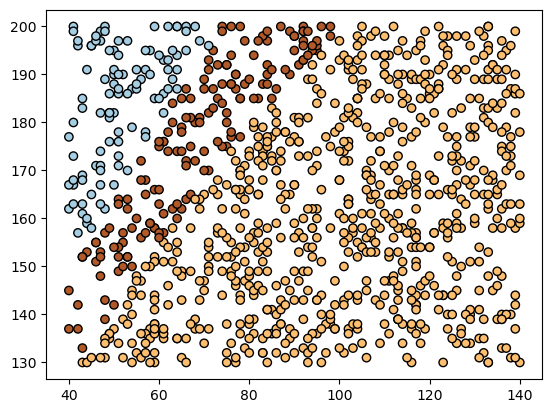

X shape: (1000, 2) Y shape: (1000,)


In [52]:
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.show()
print('X shape:', X.shape, 'Y shape:', Y.shape)

## Lab 13-1: 4-Fold Cross Validation (1 point)

Create a Logistic regression model and implement 4-fold cross validation. 

Set max_iter = 1000 (parameter of LogisticRegression)

### Reference
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [53]:
# 13-1 begin
K=4

reg = LogisticRegression(max_iter=1000)
scores = cross_val_score(reg, X, Y, cv=4)

for i in range(K):
    print(f'Fold {i}: score is {scores[i]}')
#13-1 end

Fold 0: score is 0.996
Fold 1: score is 0.988
Fold 2: score is 0.984
Fold 3: score is 0.992


## Lab 13-2: Split train-test dataset and Training (2 point)
Randomly split data into `700 train` data and `300 test` data. (70% is train, 30% is test). And compare the performance of the two models with the penalty parameters `l2` and `none`.

* hint: `train_X.shape` is (700,2) and `test_X.shape` is (300,2)

### Reference

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [54]:
# split the train and test dataset
train_X, test_X, train_Y, test_Y = train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

In [55]:
print(train_X.shape, test_X.shape)

(700, 2) (300, 2)


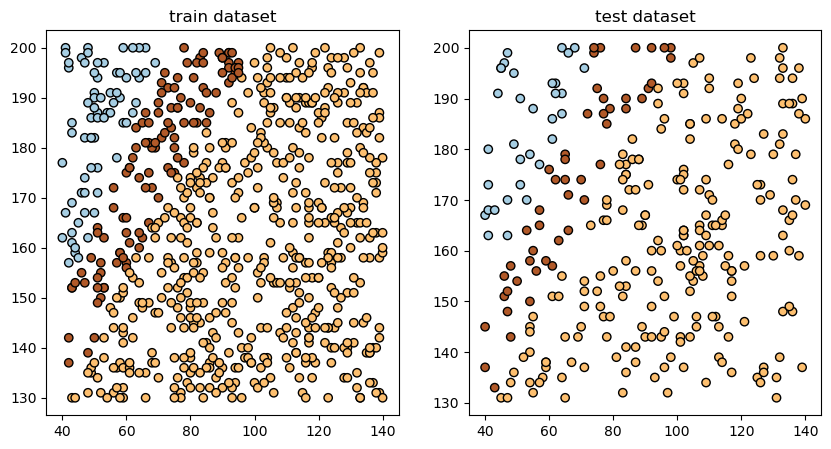

In [56]:
# visualize train and test data using subplot
fig, (traindataset, testdataset) = plt.subplots(1, 2, figsize=(10, 5))

# Plot train data
traindataset.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, edgecolors='k', cmap=plt.cm.Paired)
traindataset.set_title('train dataset')

# Plot test data
testdataset.scatter(test_X[:, 0], test_X[:, 1], c=test_Y, edgecolors='k', cmap=plt.cm.Paired)
testdataset.set_title('test dataset')

plt.show()

In [57]:
# penalty = 'l2'
l2_reg = LogisticRegression(penalty='l2', max_iter=1000)
l2_reg.fit(train_X, train_Y)
accuracy = l2_reg.score(test_X, test_Y)
print(f'using l2: test accuracy is {accuracy*100:.1f} %')

# penalty = 'none'
none_reg = LogisticRegression(penalty=None, max_iter=1000)
none_reg.fit(train_X, train_Y)
accuracy = none_reg.score(test_X, test_Y)
print(f'using none: test accuracy is {accuracy*100:.1f} %')


using l2: test accuracy is 98.7 %
using none: test accuracy is 99.0 %


## Visualize

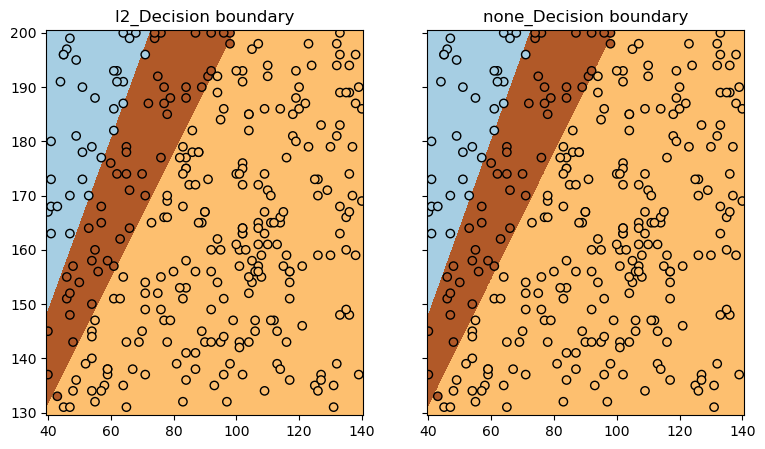

Eddy is 175cm tall and weighs 60kg; according to the l2 model, he is considered to be normal.
Vicky is 171cm tall and weighs 48kg; according to the none model, she is considered to be thin.


In [59]:
# visualize decision boundary of 'l2' and 'none' model
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z=[[],[]]
Z[0] = l2_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z[0] = Z[0].reshape(xx.shape)
Z[1] = none_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z[1] = Z[1].reshape(xx.shape)


fig, axes = plt.subplots(1, 2, figsize=(9,5), sharey=True)

for i in range(2):
    axes[i].pcolormesh(xx, yy, Z[i], cmap=plt.cm.Paired, shading='auto')
    axes[i].scatter(test_X[:, 0], test_X[:, 1], c=test_Y, edgecolors='k', cmap=plt.cm.Paired)
    axes[i].set_xlim(xx.min(), xx.max())
    axes[i].set_ylim(yy.min(), yy.max())
axes[0].set_title('l2_Decision boundary')
axes[1].set_title('none_Decision boundary')
plt.show()

print(f'Eddy is 175cm tall and weighs 60kg; according to the l2 model, he is considered to be {bmi_map[l2_reg.predict(np.array([[60,175]]))[0]]}.')
print(f'Vicky is 171cm tall and weighs 48kg; according to the none model, she is considered to be {bmi_map[l2_reg.predict(np.array([[48,171]]))[0]]}.')

## Lab 13-3: Pre-processing Iris Dataset using 4 Component (4 point)
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray.

Our goal is to classify Versicolour and Virginica with target numbers 1 and 2 using petal length and width. From the data below, select  target numbers 1 and 2, then divide them into 70 training data and 30 test data. Here, you have to change target numbers 1 to 0 and 2 to 1.

* hint: Use `to_numpy` to convert pandas to numpy

### Reference
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [66]:
# 13-3 begin
# Load Data
iris_data = load_iris()
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['target'] = iris_data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [67]:
# Data pre-processing
df = df[df['target'] != 0]
df.loc[df['target'] == 1, 'target'] = 0
df.loc[df['target'] == 2, 'target'] = 1
# split the train and test dataset
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
Y = df['target'].to_numpy()
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)
# 13-3 end

print('test X shape:', test_X.shape, 'test Y shape:', test_Y.shape)

test X shape: (30, 4) test Y shape: (30,)


## Lab 13-4: Classify Iris Dataset using 4 Component (3 point)

After learning the linear/logistic regression model, implement 4-Fold Cross Validation.

And compare each score.

### Reference
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [63]:
# 13-4 begin

# create Linear Regression Model
reg = LinearRegression()

# train the model
reg.fit(train_X, train_Y)

# check the results
scores = cross_val_score(reg,test_X,test_Y, cv=4)

for i in range(K):
    print(f'Fold {i}: score is {scores[i]}')

Fold 0: score is 0.618042532772891
Fold 1: score is 0.31172575772023825
Fold 2: score is 0.5639727403014465
Fold 3: score is 0.686628232238208


In [30]:
# create Logistic Regression Model
reg = LogisticRegression(max_iter=1000)

# train the model
reg.fit(train_X, train_Y)

# check the results
scores = cross_val_score(reg,test_X,test_Y,cv=4)

for i in range(K):
    print(f'Fold {i}: score is {scores[i]}')
    
# 13-4 end

Fold 0: score is 1.0
Fold 1: score is 0.875
Fold 2: score is 0.8571428571428571
Fold 3: score is 0.8571428571428571
